In [ ]:
### Portfolio_Analysis


In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

In [2]:
#### Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [3]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
whale_df = pd.read_csv( Path('Resources/whale_navs.csv'), index_col = "date", parse_dates= True, infer_datetime_format= True)  
    
    
# Using display function to view first and last 5 rows of the DataFrame
display(whale_df.head())
display(whale_df.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


In [4]:
#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [5]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Using isnull fuction in conjuction with the sum function to check any missing values in whale dataframe.
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
dtype: int64

In [6]:
# Using describe function to generate summary of whale dataframe.
whale_df.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,30.917449,14.846051,60.738068,56.672164,250.638925
std,0.485997,0.240011,0.751144,4.185067,41.005779
min,29.982497,14.032967,59.375252,51.105327,182.860000
25%,30.453881,14.714174,60.230331,52.088281,210.157500
50%,30.795678,14.882191,60.594338,57.766241,247.425000
75%,31.350904,14.991809,60.766422,60.369093,283.262500
max,32.315955,15.438711,63.511175,65.578492,357.700000


In [7]:
# Since, there are no columns to drop any rows with all missing values

# Review the first five rows of the daily returns DataFrame.
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [8]:
# Using the pct_change function together with dropna to create the daily returns DataFrame.
whale_daily_returns = whale_df.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

In [9]:
#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='date', ylabel='percentage daily returns'>

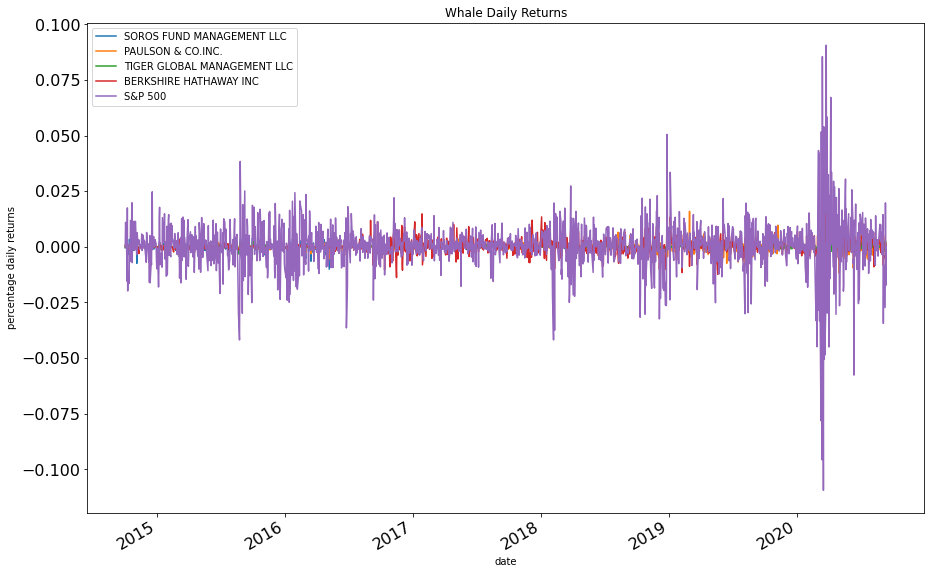

In [10]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
whale_daily_returns.plot(figsize=(15,10), title='Whale Daily Returns', fontsize=16,  ylabel="percentage daily returns")

In [11]:
#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [12]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Calculating the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + whale_daily_returns).cumprod()
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


In [13]:
#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='date'>

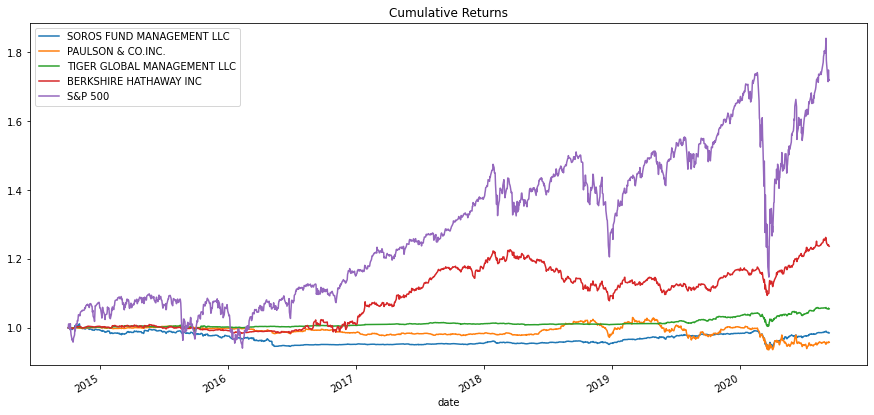

In [14]:
# Creating a plot of cucumulative returnsof the 4 fund portfolios and the S&P 500
cumulative_returns.plot(figsize=(15, 7), title="Cumulative Returns")

In [15]:
#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # According to the cumulative return statistics, no fund portfolio outperformed the S&P 500 Index .

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

In [16]:
#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Whale Daily Returns'}, ylabel='percentage daily returns'>

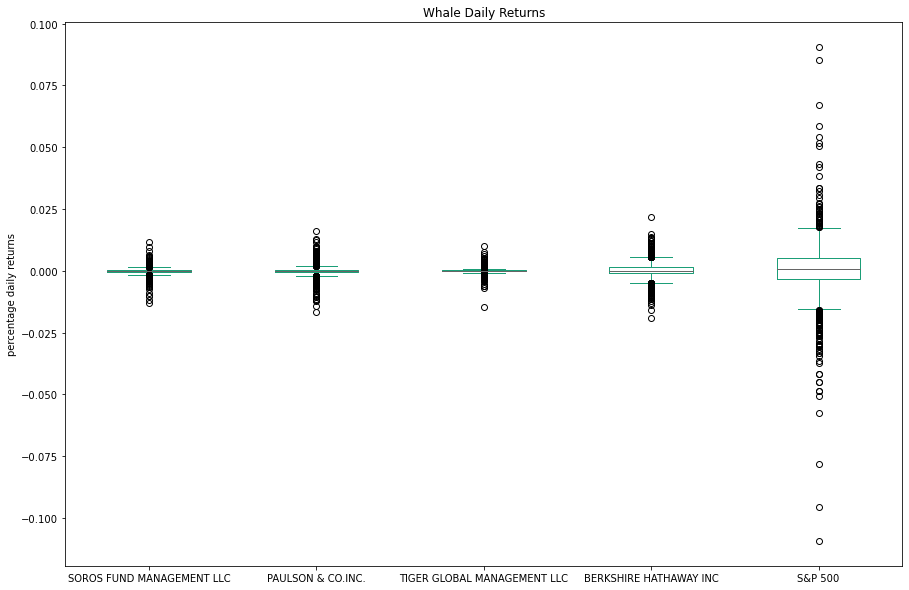

In [17]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
whale_daily_returns.plot(kind="box", figsize=(15,10), title='Whale Daily Returns', fontsize=10,  ylabel="percentage daily returns", colormap='Dark2' )


In [18]:
#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [19]:
# Creating a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame.
whale_portfolios = whale_df.drop(columns=["S&P 500"])

# Review the first 5 rows of the new DataFrame.
whale_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712
2014-10-02,31.936110,14.994072,59.978626,51.957619
2014-10-03,31.969707,14.999596,60.002264,52.022484
2014-10-06,32.048215,14.999471,60.006244,52.036387
2014-10-07,31.964216,14.994720,59.993735,52.005864


In [20]:
# Calculatingthe daily returns of new DataFrame by using the pct_change function together with dropna. 
whale_portfolios_returns = whale_portfolios.pct_change().dropna()

# Review the first five rows of the daily returns DataFrame.
whale_portfolios_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


<AxesSubplot:title={'center':'Whale Portfolios'}>

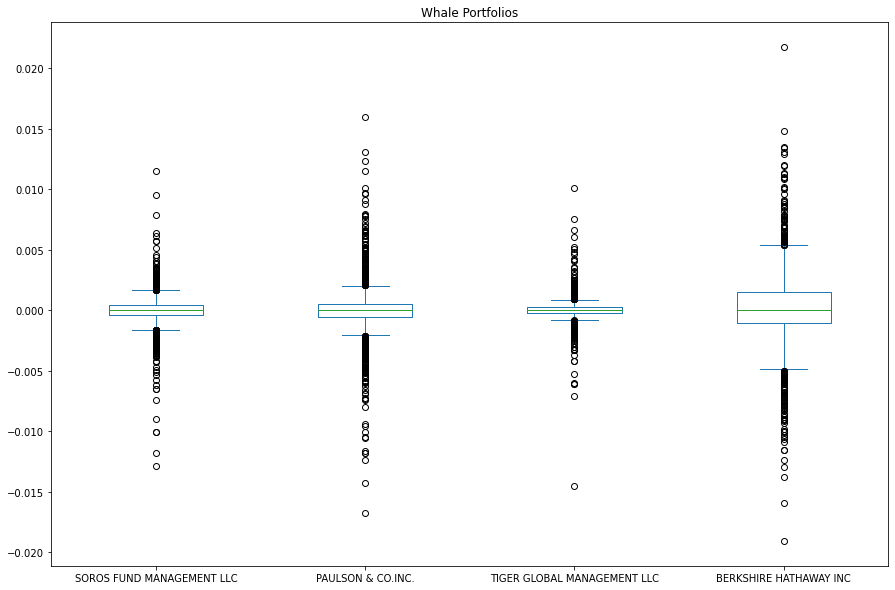

In [21]:
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
whale_portfolios_returns.plot(kind="box", figsize=(15,10), title='Whale Portfolios', fontsize=10)

In [22]:
#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # According to the box plot, BERKSHIRE HATHAWAY INC. is the fund with the highest volatility (that is, has the largest spread), while TIGER GLOBAL MANAGEMENT LLC. has the least volatile (that is, has the smallest spread).

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

In [23]:
#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [24]:
# Calculating the standard deviation for all 4 portfolios and the S&P 500
whale_standard_deviation = whale_daily_returns.std()

# Review the standard deviations
whale_standard_deviation.head()

SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
TIGER GLOBAL MANAGEMENT LLC    0.000996
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [25]:
# Sorting the standard deviations from smallest to largest
whale_standard_deviation_sorted = whale_standard_deviation.sort_values()

# Review the standard deviations sorted smallest to largest
whale_standard_deviation_sorted.head()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [26]:
# Sorting the standard deviations from smallest to largest
whale_standard_deviation_sorted = whale_standard_deviation.sort_values()

# Review the standard deviations sorted smallest to largest
whale_standard_deviation_sorted.head()#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [27]:
# Calculate the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
annualized_standard_deviation = whale_standard_deviation *np.sqrt(252)

# Review the annual standard deviations 
annualized_standard_deviation.head()

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

In [28]:
# Sorting the standard deviations from smallest to largest
annualized_standard_deviation_sorted = annualized_standard_deviation.sort_values()

# Review the standard deviations sorted smallest to largest
annualized_standard_deviation_sorted.head()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

In [29]:
#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Annualized Standard Deviation'}, xlabel='date'>

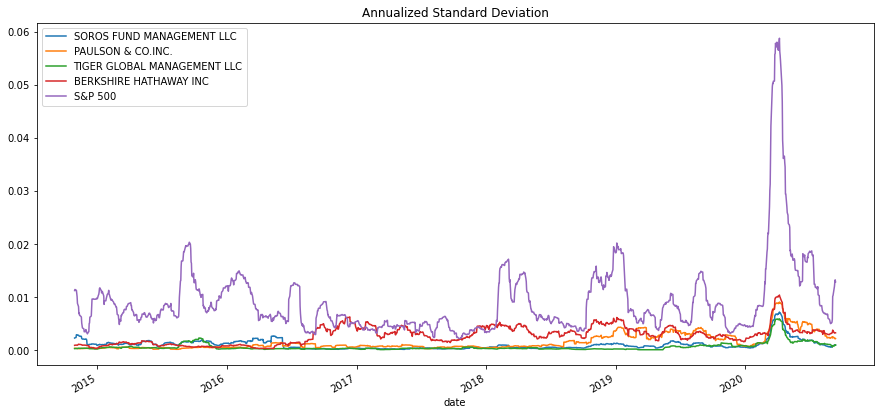

In [30]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
whale_daily_returns.rolling(window=21).std().plot(figsize=(15, 7), title="Annualized Standard Deviation")

In [31]:
#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolios Standard Deviation'}, xlabel='date'>

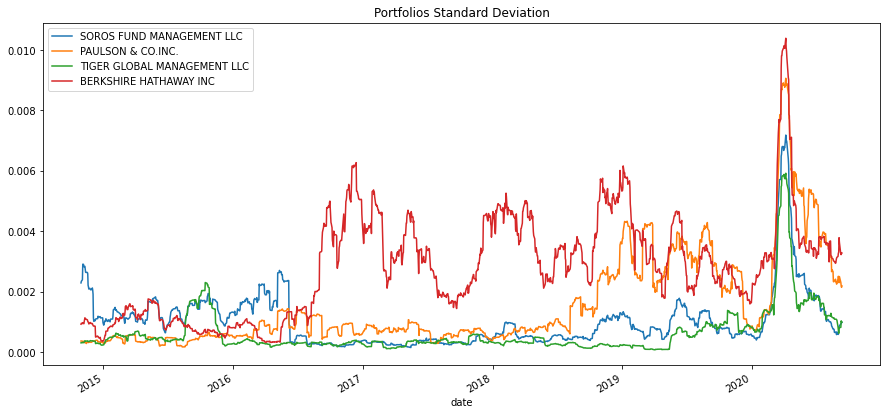

In [32]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
whale_portfolios_returns.rolling(window=21).std().plot(figsize=(15, 7), title="Portfolios Standard Deviation")

In [33]:


#### Step 5: Answer the following three questions:

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # According to the annualized standard deviation, none of the four portfolios are riskier than the S&P 500 because these funds are less volatile.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # The rolling measures indicate that the risk of each portfolio rises roughly at the same time as the risk of the S&P 500, which is in the first few months of 2020.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Berkshire Hathaway INC is the riskiest company based on the rolling standard deviations of just the four fund portfolios. Soros Fund Management LLC had a higher risk at the beginning of 2015, followed by Berkshire Hathaway INC, and the risk levels for the other two fund portfolios were similar. However, around the middle of 2016, Berkshire Hathway INC showed an increase in risk, with the peak occurring in the middle of 2020.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

In [34]:
#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [35]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
annual_average_returns= whale_daily_returns.mean() * 252
annual_average_returns

SOROS FUND MANAGEMENT LLC     -0.002281
PAULSON & CO.INC.             -0.006633
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [36]:
annual_average_returns_sorted = annual_average_returns.sort_values()
annual_average_returns_sorted

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [37]:
#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [38]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
annualized_Sharpe_Ratios = annual_average_returns / annualized_standard_deviation
annualized_Sharpe_Ratios

SOROS FUND MANAGEMENT LLC     -0.102290
PAULSON & CO.INC.             -0.189998
TIGER GLOBAL MANAGEMENT LLC    0.579002
BERKSHIRE HATHAWAY INC         0.717512
S&P 500                        0.589612
dtype: float64

In [39]:
annualized_Sharpe_Ratios_sorted = annualized_Sharpe_Ratios.sort_values()
annualized_Sharpe_Ratios_sorted

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

In [40]:
#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe ratios'}>

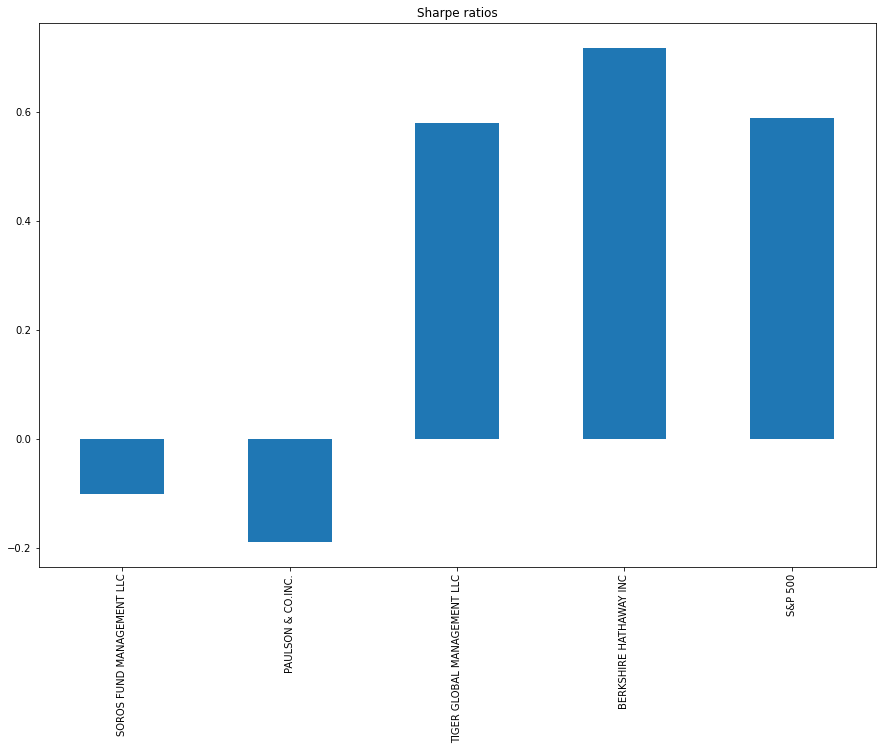

In [41]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
annualized_Sharpe_Ratios.plot(kind="bar", figsize=(15,10), title='Sharpe ratios', fontsize=10)


In [42]:
#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** #Berkshire Hathaway INC has the best risk-return profile, according to the Sharpe Ratios bar charts. The risk return profile offered by Paulson and Co INC is the poorest.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

In [43]:
#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [44]:
whale_rolling_portfolios = whale_daily_returns.rolling(window=60).var().dropna()
whale_rolling_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.000001,0.000009,0.000002,0.000012,0.000103
2020-09-08,0.000001,0.000009,0.000002,0.000012,0.000116
2020-09-09,0.000001,0.000009,0.000002,0.000012,0.000120
2020-09-10,0.000001,0.000009,0.000002,0.000012,0.000121
2020-09-11,0.000001,0.000009,0.000002,0.000012,0.000120


In [45]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
variance_portfolios = whale_daily_returns["S&P 500"].rolling(window=60).var()
variance_portfolios.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [46]:
##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [47]:
# Calculate the covariance using a 60-day rolling window 
Berkshire_covariance = whale_daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_daily_returns["S&P 500"])
# Review the last five rows of the covariance data
Berkshire_covariance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [48]:
##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [49]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
Berkshire_beta = Berkshire_covariance / variance_portfolios
# Review the last five rows of the beta information
Berkshire_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [50]:
##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [51]:
# Calculate the average of the 60-day rolling beta
Berkshire_mean = Berkshire_beta.mean()
Berkshire_mean

0.2214986101354593

In [52]:
##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC 60-day rolling beta'}, xlabel='date'>

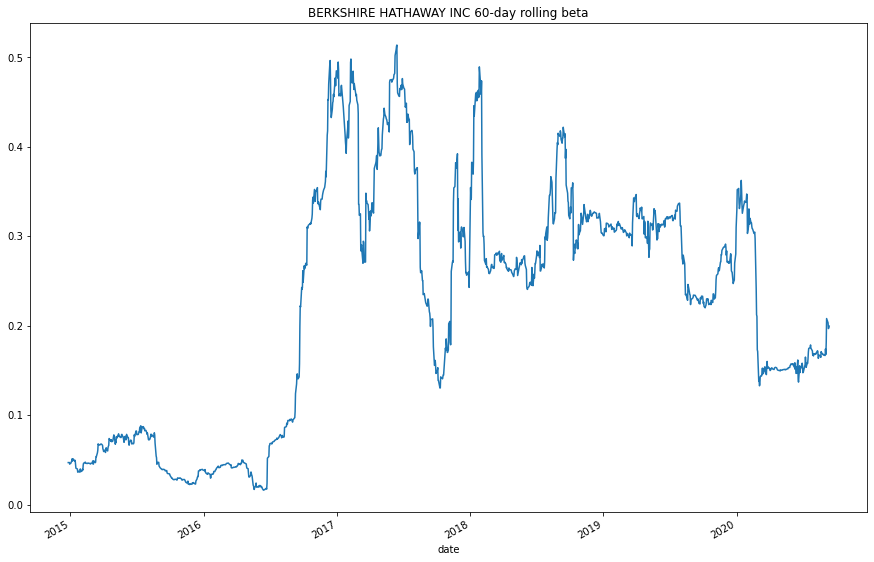

In [66]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
Berkshire_beta.plot(figsize=(15,10), title='BERKSHIRE HATHAWAY INC 60-day rolling beta', fontsize=10)

In [54]:
##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [55]:
# Calculate the covariance using a 60-day rolling window 
Tiger_covariance = whale_daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whale_daily_returns["S&P 500"])
# Review the last five rows of the covariance data
Tiger_covariance.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [56]:
##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [57]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
Tiger_beta = Tiger_covariance / variance_portfolios
# Review the last five rows of the beta information
Tiger_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [58]:
##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [63]:
# Calculate the average of the 60-day rolling beta
Tiger_mean = Tiger_beta.mean()
Tiger_mean

0.03093001487238774

In [60]:
##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'TIGER GLOBAL MANAGEMENT LLC 60-day rolling beta'}, xlabel='date'>

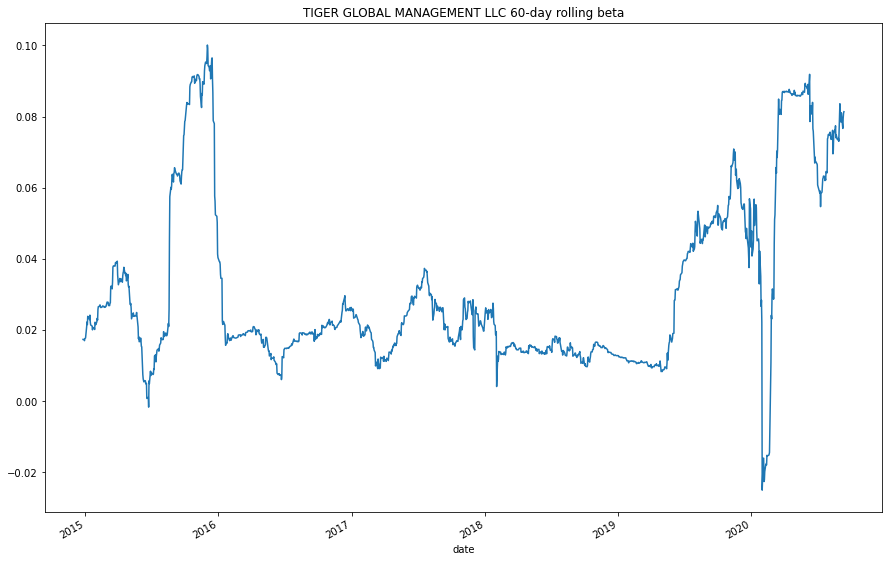

In [65]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
Tiger_beta.plot( figsize=(15,10), title='TIGER GLOBAL MANAGEMENT LLC 60-day rolling beta', fontsize=10)

In [62]:
#### Answer the following two questions:

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Compared to Tiger Global Management LLC, Berkshire Hathaway is more vulnerable to changes in the S&P 500 because of its higher correlation with the S&P 500.

**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** #  I would recommend Berkshire Hathaway as a far better investment from a standpoint for inclusion in my firm's suite of fund offerings. Berkshire Hathaway exhibits higher beta and Sharpe ratio compared to Tiger Global Management LLC, therefore, Berkshire Hathaway displays a balanced reward-risk profile and better returns than Tiger Global Management LLC.